# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

# Parameters

In [2]:
fig_dir = 'data/figure'
exp_name = 'compare_methods'
time_path = 'data/time/compare_methods_2020_12_3_18_38_42.npy'
cost_path = 'data/cost/compare_methods_2020_12_3_18_38_42.npy'
methods = ['greedy', 'optimal', 'approx', 'approx_woc']
sizes = np.arange(1, 11)
repeats = 10

# Load data

In [3]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(10, 4) (10, 4)
Wall time: 17.9 ms


# Convert to DataFrame

In [4]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10, 6), columns=methods)
print(df_time.shape)
print(df_time.info())
display(df_time)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   optimal     10 non-null     float64
 2   approx      10 non-null     float64
 3   approx_woc  10 non-null     float64
dtypes: float64(4)
memory usage: 448.0 bytes
None


,greedy,optimal,approx,approx_woc
0,0.0,45.768548,0.935525,0.124708
1,0.0,39.984697,0.604355,0.088763
2,0.0,47.515242,0.801325,0.125039
3,0.0,44.244973,0.597165,0.086795
4,0.0,39.448140,0.741067,0.160571
5,0.0,44.060832,0.725919,0.068836
6,0.0,41.753859,0.527540,0.057846
7,0.0,42.831837,0.714118,0.136608
8,0.0,45.767569,0.611367,0.073332
9,0.0,37.444852,0.744334,0.081804


In [5]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   optimal     10 non-null     float64
 2   approx      10 non-null     float64
 3   approx_woc  10 non-null     float64
dtypes: float64(4)
memory usage: 448.0 bytes
None


,greedy,optimal,approx,approx_woc
0,12287.0,8718.0,8718.0,10885.0
1,11510.0,9767.0,10183.0,10122.0
2,9190.0,7777.0,7777.0,7980.0
3,10717.0,8592.0,9319.0,9153.0
4,12709.0,10156.0,10636.0,11618.0
5,9505.0,7875.0,8665.0,8842.0
6,9736.0,8634.0,8634.0,8634.0
7,11360.0,7825.0,7825.0,7825.0
8,11271.0,10764.0,10828.0,11159.0
9,13261.0,10214.0,10460.0,11255.0


# Calculate metrics 

## Processing time

In [6]:
df_time.mean()

greedy         0.000000
optimal       42.882055
approx         0.700272
approx_woc     0.100430
dtype: float64

## Approximation ratio

In [7]:
df_cost.loc[:, 'approx_ratio'] = df_cost['approx']/df_cost['optimal']
df_cost.loc[:, 'approx_woc_ratio'] = df_cost['approx_woc']/df_cost['optimal']
df_cost.loc[:, 'greedy_ratio'] = df_cost['greedy']/df_cost['optimal']
display(df_cost)

,greedy,optimal,approx,approx_woc,approx_ratio,approx_woc_ratio,greedy_ratio
0,12287.0,8718.0,8718.0,10885.0,1.000000,1.248566,1.409383
1,11510.0,9767.0,10183.0,10122.0,1.042592,1.036347,1.178458
2,9190.0,7777.0,7777.0,7980.0,1.000000,1.026103,1.181690
3,10717.0,8592.0,9319.0,9153.0,1.084614,1.065293,1.247323
4,12709.0,10156.0,10636.0,11618.0,1.047263,1.143954,1.251378
5,9505.0,7875.0,8665.0,8842.0,1.100317,1.122794,1.206984
6,9736.0,8634.0,8634.0,8634.0,1.000000,1.000000,1.127635
7,11360.0,7825.0,7825.0,7825.0,1.000000,1.000000,1.451757
8,11271.0,10764.0,10828.0,11159.0,1.005946,1.036696,1.047101
9,13261.0,10214.0,10460.0,11255.0,1.024085,1.101919,1.298316


In [8]:
df_cost[['approx_ratio', 'approx_woc_ratio', 'greedy_ratio']].mean()

approx_ratio        1.030482
approx_woc_ratio    1.078167
greedy_ratio        1.240003
dtype: float64

## Ride-sharing efficiency

In [9]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
df_cost.loc[:, 'optimal_gain'] = df_cost['greedy']/df_cost['optimal']
display(df_cost)

,greedy,optimal,approx,approx_woc,approx_ratio,approx_woc_ratio,greedy_ratio,approx_gain,approx_woc_gain,optimal_gain
0,12287.0,8718.0,8718.0,10885.0,1.000000,1.248566,1.409383,1.409383,1.128801,1.409383
1,11510.0,9767.0,10183.0,10122.0,1.042592,1.036347,1.178458,1.130315,1.137127,1.178458
2,9190.0,7777.0,7777.0,7980.0,1.000000,1.026103,1.181690,1.181690,1.151629,1.181690
3,10717.0,8592.0,9319.0,9153.0,1.084614,1.065293,1.247323,1.150016,1.170873,1.247323
4,12709.0,10156.0,10636.0,11618.0,1.047263,1.143954,1.251378,1.194904,1.093906,1.251378
5,9505.0,7875.0,8665.0,8842.0,1.100317,1.122794,1.206984,1.096942,1.074983,1.206984
6,9736.0,8634.0,8634.0,8634.0,1.000000,1.000000,1.127635,1.127635,1.127635,1.127635
7,11360.0,7825.0,7825.0,7825.0,1.000000,1.000000,1.451757,1.451757,1.451757,1.451757
8,11271.0,10764.0,10828.0,11159.0,1.005946,1.036696,1.047101,1.040912,1.010037,1.047101
9,13261.0,10214.0,10460.0,11255.0,1.024085,1.101919,1.298316,1.267782,1.178232,1.298316


In [10]:
df_cost[['approx_gain', 'approx_woc_gain', 'optimal_gain']].mean()

approx_gain        1.205134
approx_woc_gain    1.152498
optimal_gain       1.240003
dtype: float64

In [11]:
df_cost[['greedy', 'optimal', 'approx', 'approx_woc']].mean()

greedy        11154.6
optimal        9032.2
approx         9304.5
approx_woc     9747.3
dtype: float64

# Plots

## Processing time

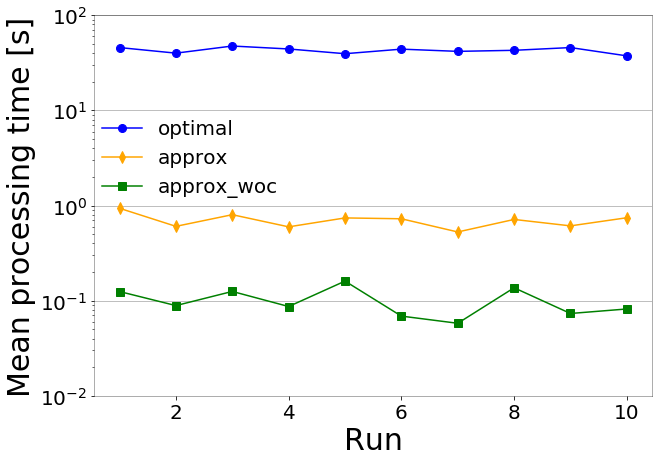

In [12]:
plot_proc_time(
    df_time, 
    sizes, 
    exp_name, 
    ylim=(10**-2, 10**2),
    plot_optimal=True
)

## Travel cost

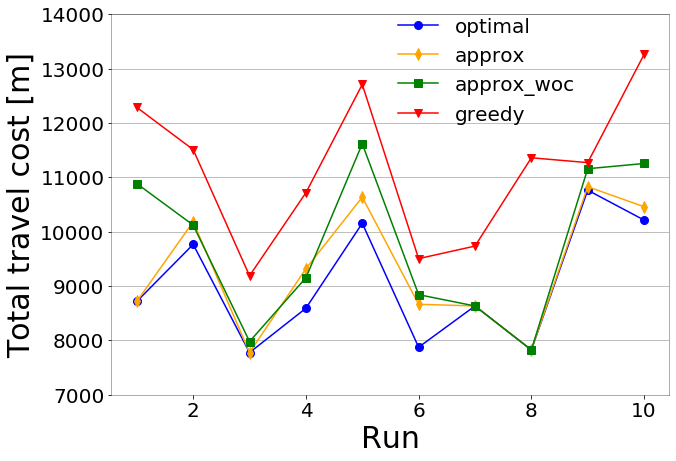

In [13]:
plot_travel_cost(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(7000,14000),
    plot_optimal=True
)

## Approximation ratio

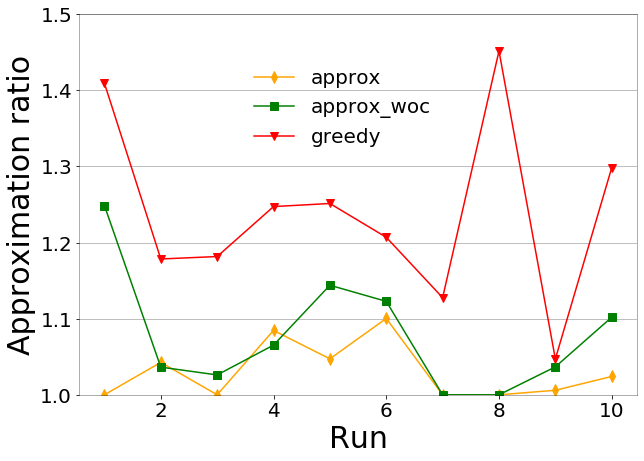

In [14]:
plot_approx_ratio(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(1.,1.5)
)

## Ride-sharing efficiency

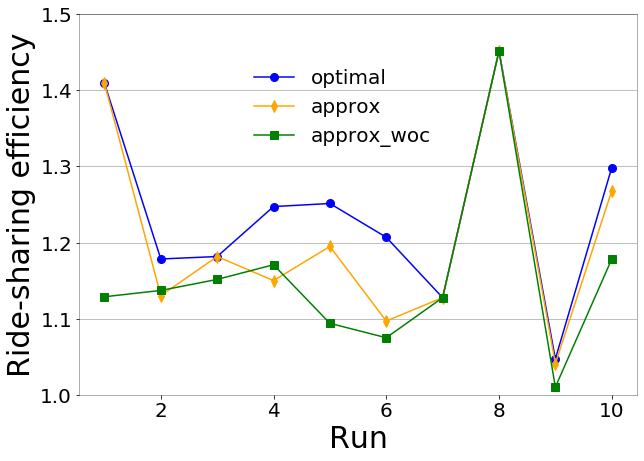

In [15]:
plot_rs_efficiency(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(1.,1.5),
    plot_optimal=True
)